In [1]:
import h2o

In [2]:
h2o.connect()

Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,1 hour 20 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_avkash_8eyink
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.999 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [3]:
from h2o.estimators.gbm  import H2OGradientBoostingEstimator

In [5]:
h2o.ls()

,key
0,GLM_model_python_1644623179919_1137
1,gbm-c732219d-39da-4a45-bc6d-ee1e8293ab46
2,loan_test.hex
3,loan_train.hex
4,loan_train1.hex
5,modelmetrics_GLM_model_python_1644623179919_11...
6,modelmetrics_GLM_model_python_1644623179919_11...
7,modelmetrics_gbm-c732219d-39da-4a45-bc6d-ee1e8...
8,pdp-1750626f-e852-4ae0-9c57-cfb1404bc245
9,pdp-b761dd6b-7e38-4cfe-a6e0-289a5da14588


In [13]:
h2o.ls()

,key
0,GLM_model_python_1644623179919_1137
1,gbm-c732219d-39da-4a45-bc6d-ee1e8293ab46
2,loan_test.hex
3,loan_train.hex
4,loan_train1.hex
5,modelmetrics_GLM_model_python_1644623179919_11...
6,modelmetrics_GLM_model_python_1644623179919_11...
7,modelmetrics_gbm-c732219d-39da-4a45-bc6d-ee1e8...
8,pdp-1750626f-e852-4ae0-9c57-cfb1404bc245
9,pdp-b761dd6b-7e38-4cfe-a6e0-289a5da14588


In [6]:
loan_gbm = H2OGradientBoostingEstimator(seed=1234)

In [18]:
loan_data = h2o.get_frame('loan_train.hex')

In [19]:
loan_data

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,nan,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


In [20]:
loan_data.shape

(614, 13)

In [21]:
train, valid = loan_data.split_frame(ratios=[.66])

In [22]:
train

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N
LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y
LP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y


In [23]:
valid

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,nan,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y
LP001029,Male,No,0,Graduate,No,1853,2840,114,360,1,Rural,N
LP001038,Male,Yes,0,Not Graduate,No,4887,0,133,360,1,Rural,N
LP001041,Male,Yes,0,Graduate,,2600,3500,115,nan,1,Urban,Y
LP001047,Male,Yes,0,Not Graduate,No,2600,1911,116,360,0,Semiurban,N
LP001068,Male,Yes,0,Graduate,No,2799,2253,122,360,1,Semiurban,Y
LP001073,Male,Yes,2,Not Graduate,No,4226,1040,110,360,1,Urban,Y
LP001087,Female,No,2,Graduate,,3750,2083,120,360,1,Semiurban,Y


In [24]:
predictors = train.columns[:-1]

In [26]:
predictors

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [27]:
response = "Loan_Status"

In [28]:
loan_gbm.train(x=predictors,
              y=response,
              training_frame=train,
              validation_frame=valid)

gbm Model Build progress: |

/Users/avkash/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [Loan_ID]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644623179919_1140


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11038.0,5.0,5.0,5.0,6.0,21.0,12.94




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07848647170422027
RMSE: 0.2801543712031284
LogLoss: 0.27503156525983635
Mean Per-Class Error: 0.100918458781362
AUC: 0.9716621863799283
AUCPR: 0.9875087321866651
Gini: 0.9433243727598566

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6422248944901441: 


,,N,Y,Error,Rate
0,N,105.0,19.0,0.1532,(19.0/124.0)
1,Y,14.0,274.0,0.0486,(14.0/288.0)
2,Total,119.0,293.0,0.0801,(33.0/412.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.642225,0.943201,283.0
1,max f2,0.503763,0.968179,314.0
2,max f0point5,0.717383,0.952206,259.0
3,max accuracy,0.642225,0.919903,283.0
4,max precision,0.974704,1.000000,0.0
5,max recall,0.396977,1.000000,336.0
6,max specificity,0.974704,1.000000,0.0
7,max absolute_mcc,0.642225,0.807777,283.0
8,max min_per_class_accuracy,0.700341,0.911290,265.0
9,max mean_per_class_accuracy,0.717383,0.913362,259.0



Gains/Lift Table: Avg response rate: 69.90 %, avg score: 69.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.012136,0.970763,1.430556,1.430556,1.000000,0.972297,1.000000,0.972297,0.017361,0.017361,43.055556,43.055556,0.017361
1,2,0.021845,0.968565,1.430556,1.430556,1.000000,0.969319,1.000000,0.970973,0.013889,0.031250,43.055556,43.055556,0.031250
2,3,0.031553,0.966915,1.430556,1.430556,1.000000,0.967805,1.000000,0.969998,0.013889,0.045139,43.055556,43.055556,0.045139
3,4,0.041262,0.963862,1.430556,1.430556,1.000000,0.965429,1.000000,0.968923,0.013889,0.059028,43.055556,43.055556,0.059028
4,5,0.050971,0.961378,1.430556,1.430556,1.000000,0.962738,1.000000,0.967745,0.013889,0.072917,43.055556,43.055556,0.072917
5,6,0.101942,0.949922,1.430556,1.430556,1.000000,0.955402,1.000000,0.961574,0.072917,0.145833,43.055556,43.055556,0.145833
6,7,0.152913,0.936780,1.430556,1.430556,1.000000,0.943777,1.000000,0.955641,0.072917,0.218750,43.055556,43.055556,0.218750
7,8,0.201456,0.924879,1.430556,1.430556,1.000000,0.930489,1.000000,0.949581,0.069444,0.288194,43.055556,43.055556,0.288194
8,9,0.300971,0.896593,1.430556,1.430556,1.000000,0.910766,1.000000,0.936747,0.142361,0.430556,43.055556,43.055556,0.430556
9,10,0.400485,0.854628,1.430556,1.430556,1.000000,0.876073,1.000000,0.921670,0.142361,0.572917,43.055556,43.055556,0.572917




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1521236350367901
RMSE: 0.3900303001521678
LogLoss: 0.47698309081900947
Mean Per-Class Error: 0.2721685689201054
AUC: 0.799111062335382
AUCPR: 0.8706180213774178
Gini: 0.598222124670764

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4373540410643323: 


,,N,Y,Error,Rate
0,N,32.0,36.0,0.5294,(36.0/68.0)
1,Y,2.0,132.0,0.0149,(2.0/134.0)
2,Total,34.0,168.0,0.1881,(38.0/202.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437354,0.874172,165.0
1,max f2,0.243674,0.940594,168.0
2,max f0point5,0.707954,0.833333,130.0
3,max accuracy,0.437354,0.811881,165.0
4,max precision,0.977305,1.000000,0.0
5,max recall,0.069333,1.000000,189.0
6,max specificity,0.977305,1.000000,0.0
7,max absolute_mcc,0.437354,0.575515,165.0
8,max min_per_class_accuracy,0.756747,0.720588,114.0
9,max mean_per_class_accuracy,0.707954,0.752414,130.0



Gains/Lift Table: Avg response rate: 66.34 %, avg score: 69.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014851,0.972897,1.507463,1.507463,1.000000,0.974472,1.000000,0.974472,0.022388,0.022388,50.746269,50.746269,0.022388
1,2,0.024752,0.970866,1.507463,1.507463,1.000000,0.971881,1.000000,0.973435,0.014925,0.037313,50.746269,50.746269,0.037313
2,3,0.034653,0.968711,1.507463,1.507463,1.000000,0.969097,1.000000,0.972196,0.014925,0.052239,50.746269,50.746269,0.052239
3,4,0.044554,0.962312,1.507463,1.507463,1.000000,0.962827,1.000000,0.970114,0.014925,0.067164,50.746269,50.746269,0.067164
4,5,0.054455,0.956024,1.507463,1.507463,1.000000,0.958328,1.000000,0.967971,0.014925,0.082090,50.746269,50.746269,0.082090
5,6,0.103960,0.944997,1.356716,1.435679,0.900000,0.950564,0.952381,0.959682,0.067164,0.149254,35.671642,43.567875,0.134548
6,7,0.153465,0.935294,1.356716,1.410207,0.900000,0.938087,0.935484,0.952716,0.067164,0.216418,35.671642,41.020703,0.187006
7,8,0.202970,0.930385,1.055224,1.323626,0.700000,0.933438,0.878049,0.948014,0.052239,0.268657,5.522388,32.362577,0.195127
8,9,0.301980,0.898546,1.205970,1.285050,0.800000,0.915535,0.852459,0.937365,0.119403,0.388060,20.597015,28.505016,0.255707
9,10,0.400990,0.856165,1.281343,1.284135,0.850000,0.878103,0.851852,0.922732,0.126866,0.514925,28.134328,28.413488,0.338455




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-11 17:13:17,0.001 sec,0.0,0.458680,0.611685,0.500000,0.699029,1.000000,0.300971,0.473902,0.641737,0.500000,0.663366,1.000000,0.336634
1,,2022-02-11 17:13:17,0.008 sec,1.0,0.441372,0.575727,0.850204,0.922598,1.430556,0.186893,0.459090,0.610188,0.748354,0.824620,1.376379,0.188119
2,,2022-02-11 17:13:17,0.013 sec,2.0,0.426915,0.547622,0.856855,0.926273,1.430556,0.179612,0.447218,0.586656,0.761304,0.845191,1.507463,0.188119
3,,2022-02-11 17:13:17,0.019 sec,3.0,0.414772,0.524870,0.858801,0.927312,1.430556,0.174757,0.436698,0.566999,0.758889,0.843575,1.507463,0.188119
4,,2022-02-11 17:13:17,0.024 sec,4.0,0.404366,0.505699,0.869260,0.934223,1.430556,0.174757,0.428566,0.552305,0.755707,0.840275,1.507463,0.188119
5,,2022-02-11 17:13:17,0.029 sec,5.0,0.394709,0.487970,0.880880,0.940616,1.430556,0.167476,0.421039,0.538459,0.765968,0.845295,1.507463,0.188119
6,,2022-02-11 17:13:17,0.035 sec,6.0,0.387125,0.473922,0.882378,0.941525,1.430556,0.160194,0.415620,0.528292,0.772992,0.848671,1.507463,0.188119
7,,2022-02-11 17:13:17,0.040 sec,7.0,0.379430,0.459484,0.892935,0.946292,1.430556,0.150485,0.410867,0.519676,0.771510,0.847338,0.000000,0.193069
8,,2022-02-11 17:13:17,0.045 sec,8.0,0.373761,0.448629,0.894699,0.946803,0.000000,0.148058,0.406441,0.511422,0.775955,0.849158,1.507463,0.193069
9,,2022-02-11 17:13:17,0.050 sec,9.0,0.368233,0.438287,0.898466,0.949555,1.430556,0.148058,0.403289,0.505170,0.779960,0.854021,0.000000,0.193069



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit_History,123.119942,1.000000,0.472079
1,LoanAmount,38.043930,0.308999,0.145872
2,ApplicantIncome,33.127697,0.269068,0.127022
3,CoapplicantIncome,25.717550,0.208882,0.098609
4,Property_Area,14.029879,0.113953,0.053795
5,Dependents,12.140795,0.098609,0.046551
6,Married,8.169347,0.066353,0.031324
7,Loan_Amount_Term,2.919230,0.023710,0.011193
8,Gender,1.738947,0.014124,0.006668
9,Education,1.442456,0.011716,0.005531


In [29]:
loan_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644623179919_1140


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11038.0,5.0,5.0,5.0,6.0,21.0,12.94




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07848647170422027
RMSE: 0.2801543712031284
LogLoss: 0.27503156525983635
Mean Per-Class Error: 0.100918458781362
AUC: 0.9716621863799283
AUCPR: 0.9875087321866651
Gini: 0.9433243727598566

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6422248944901441: 


,,N,Y,Error,Rate
0,N,105.0,19.0,0.1532,(19.0/124.0)
1,Y,14.0,274.0,0.0486,(14.0/288.0)
2,Total,119.0,293.0,0.0801,(33.0/412.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.642225,0.943201,283.0
1,max f2,0.503763,0.968179,314.0
2,max f0point5,0.717383,0.952206,259.0
3,max accuracy,0.642225,0.919903,283.0
4,max precision,0.974704,1.000000,0.0
5,max recall,0.396977,1.000000,336.0
6,max specificity,0.974704,1.000000,0.0
7,max absolute_mcc,0.642225,0.807777,283.0
8,max min_per_class_accuracy,0.700341,0.911290,265.0
9,max mean_per_class_accuracy,0.717383,0.913362,259.0



Gains/Lift Table: Avg response rate: 69.90 %, avg score: 69.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.012136,0.970763,1.430556,1.430556,1.000000,0.972297,1.000000,0.972297,0.017361,0.017361,43.055556,43.055556,0.017361
1,2,0.021845,0.968565,1.430556,1.430556,1.000000,0.969319,1.000000,0.970973,0.013889,0.031250,43.055556,43.055556,0.031250
2,3,0.031553,0.966915,1.430556,1.430556,1.000000,0.967805,1.000000,0.969998,0.013889,0.045139,43.055556,43.055556,0.045139
3,4,0.041262,0.963862,1.430556,1.430556,1.000000,0.965429,1.000000,0.968923,0.013889,0.059028,43.055556,43.055556,0.059028
4,5,0.050971,0.961378,1.430556,1.430556,1.000000,0.962738,1.000000,0.967745,0.013889,0.072917,43.055556,43.055556,0.072917
5,6,0.101942,0.949922,1.430556,1.430556,1.000000,0.955402,1.000000,0.961574,0.072917,0.145833,43.055556,43.055556,0.145833
6,7,0.152913,0.936780,1.430556,1.430556,1.000000,0.943777,1.000000,0.955641,0.072917,0.218750,43.055556,43.055556,0.218750
7,8,0.201456,0.924879,1.430556,1.430556,1.000000,0.930489,1.000000,0.949581,0.069444,0.288194,43.055556,43.055556,0.288194
8,9,0.300971,0.896593,1.430556,1.430556,1.000000,0.910766,1.000000,0.936747,0.142361,0.430556,43.055556,43.055556,0.430556
9,10,0.400485,0.854628,1.430556,1.430556,1.000000,0.876073,1.000000,0.921670,0.142361,0.572917,43.055556,43.055556,0.572917




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1521236350367901
RMSE: 0.3900303001521678
LogLoss: 0.47698309081900947
Mean Per-Class Error: 0.2721685689201054
AUC: 0.799111062335382
AUCPR: 0.8706180213774178
Gini: 0.598222124670764

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4373540410643323: 


,,N,Y,Error,Rate
0,N,32.0,36.0,0.5294,(36.0/68.0)
1,Y,2.0,132.0,0.0149,(2.0/134.0)
2,Total,34.0,168.0,0.1881,(38.0/202.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437354,0.874172,165.0
1,max f2,0.243674,0.940594,168.0
2,max f0point5,0.707954,0.833333,130.0
3,max accuracy,0.437354,0.811881,165.0
4,max precision,0.977305,1.000000,0.0
5,max recall,0.069333,1.000000,189.0
6,max specificity,0.977305,1.000000,0.0
7,max absolute_mcc,0.437354,0.575515,165.0
8,max min_per_class_accuracy,0.756747,0.720588,114.0
9,max mean_per_class_accuracy,0.707954,0.752414,130.0



Gains/Lift Table: Avg response rate: 66.34 %, avg score: 69.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014851,0.972897,1.507463,1.507463,1.000000,0.974472,1.000000,0.974472,0.022388,0.022388,50.746269,50.746269,0.022388
1,2,0.024752,0.970866,1.507463,1.507463,1.000000,0.971881,1.000000,0.973435,0.014925,0.037313,50.746269,50.746269,0.037313
2,3,0.034653,0.968711,1.507463,1.507463,1.000000,0.969097,1.000000,0.972196,0.014925,0.052239,50.746269,50.746269,0.052239
3,4,0.044554,0.962312,1.507463,1.507463,1.000000,0.962827,1.000000,0.970114,0.014925,0.067164,50.746269,50.746269,0.067164
4,5,0.054455,0.956024,1.507463,1.507463,1.000000,0.958328,1.000000,0.967971,0.014925,0.082090,50.746269,50.746269,0.082090
5,6,0.103960,0.944997,1.356716,1.435679,0.900000,0.950564,0.952381,0.959682,0.067164,0.149254,35.671642,43.567875,0.134548
6,7,0.153465,0.935294,1.356716,1.410207,0.900000,0.938087,0.935484,0.952716,0.067164,0.216418,35.671642,41.020703,0.187006
7,8,0.202970,0.930385,1.055224,1.323626,0.700000,0.933438,0.878049,0.948014,0.052239,0.268657,5.522388,32.362577,0.195127
8,9,0.301980,0.898546,1.205970,1.285050,0.800000,0.915535,0.852459,0.937365,0.119403,0.388060,20.597015,28.505016,0.255707
9,10,0.400990,0.856165,1.281343,1.284135,0.850000,0.878103,0.851852,0.922732,0.126866,0.514925,28.134328,28.413488,0.338455




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-11 17:13:17,0.001 sec,0.0,0.458680,0.611685,0.500000,0.699029,1.000000,0.300971,0.473902,0.641737,0.500000,0.663366,1.000000,0.336634
1,,2022-02-11 17:13:17,0.008 sec,1.0,0.441372,0.575727,0.850204,0.922598,1.430556,0.186893,0.459090,0.610188,0.748354,0.824620,1.376379,0.188119
2,,2022-02-11 17:13:17,0.013 sec,2.0,0.426915,0.547622,0.856855,0.926273,1.430556,0.179612,0.447218,0.586656,0.761304,0.845191,1.507463,0.188119
3,,2022-02-11 17:13:17,0.019 sec,3.0,0.414772,0.524870,0.858801,0.927312,1.430556,0.174757,0.436698,0.566999,0.758889,0.843575,1.507463,0.188119
4,,2022-02-11 17:13:17,0.024 sec,4.0,0.404366,0.505699,0.869260,0.934223,1.430556,0.174757,0.428566,0.552305,0.755707,0.840275,1.507463,0.188119
5,,2022-02-11 17:13:17,0.029 sec,5.0,0.394709,0.487970,0.880880,0.940616,1.430556,0.167476,0.421039,0.538459,0.765968,0.845295,1.507463,0.188119
6,,2022-02-11 17:13:17,0.035 sec,6.0,0.387125,0.473922,0.882378,0.941525,1.430556,0.160194,0.415620,0.528292,0.772992,0.848671,1.507463,0.188119
7,,2022-02-11 17:13:17,0.040 sec,7.0,0.379430,0.459484,0.892935,0.946292,1.430556,0.150485,0.410867,0.519676,0.771510,0.847338,0.000000,0.193069
8,,2022-02-11 17:13:17,0.045 sec,8.0,0.373761,0.448629,0.894699,0.946803,0.000000,0.148058,0.406441,0.511422,0.775955,0.849158,1.507463,0.193069
9,,2022-02-11 17:13:17,0.050 sec,9.0,0.368233,0.438287,0.898466,0.949555,1.430556,0.148058,0.403289,0.505170,0.779960,0.854021,0.000000,0.193069



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit_History,123.119942,1.000000,0.472079
1,LoanAmount,38.043930,0.308999,0.145872
2,ApplicantIncome,33.127697,0.269068,0.127022
3,CoapplicantIncome,25.717550,0.208882,0.098609
4,Property_Area,14.029879,0.113953,0.053795
5,Dependents,12.140795,0.098609,0.046551
6,Married,8.169347,0.066353,0.031324
7,Loan_Amount_Term,2.919230,0.023710,0.011193
8,Gender,1.738947,0.014124,0.006668
9,Education,1.442456,0.011716,0.005531


In [30]:
loan_gbm.accuracy()

[[0.6422248944901441, 0.9199029126213593]]

In [32]:
loan_gbm.auc()

0.9716621863799283

In [61]:
loan_gbm.auc(valid=True)

0.799111062335382

In [33]:
loan_gbm.algo

'gbm'

In [35]:
loan_gbm.mse()

0.07848647170422027

In [39]:
loan_gbm.aucpr()

0.9875087321866651

In [40]:
loan_gbm.gini()

0.9433243727598566

In [60]:
loan_gbm.gini(valid=True)

0.598222124670764

In [48]:
loan_gbm.fallout()

[[0.018748250247682598, 1.0]]

In [43]:
loan_gbm.F0point5()

[[0.717383120721246, 0.952205882352941]]

In [44]:
loan_gbm.F1()

[[0.6422248944901441, 0.9432013769363167]]

In [49]:
perf = loan_gbm.model_performance()

In [50]:
perf.find_threshold_by_max_metric("f1")

0.6422248944901441

In [51]:
perf.find_threshold_by_max_metric("f2")

0.5037629285048553

In [56]:
loan_gbm.recall()

[[0.39697730013835103, 1.0]]

In [58]:
loan_gbm.precision()

[[0.974703777459929, 1.0]]

In [62]:
loan_gbm.varimp()

[('Credit_History', 123.11994171142578, 1.0, 0.47207897132922483),
 ('LoanAmount', 38.04393005371094, 0.3089989284017049, 0.14587189626170965),
 ('ApplicantIncome',
  33.1276969909668,
  0.2690684915089793,
  0.12702157668866523),
 ('CoapplicantIncome',
  25.71755027770996,
  0.2088820862016646,
  0.09860884038318429),
 ('Property_Area',
  14.029878616333008,
  0.11395293419823806,
  0.05379478395625107),
 ('Dependents', 12.14079475402832, 0.09860949075564442, 0.046551466959223325),
 ('Married', 8.169346809387207, 0.06635275078780414, 0.03132373833677099),
 ('Loan_Amount_Term',
  2.9192304611206055,
  0.02371046006472967,
  0.011193209597100247),
 ('Gender', 1.7389470338821411, 0.014124007936569411, 0.006667647137741496),
 ('Education', 1.4424558877944946, 0.011715859086218458, 0.005530810705660162),
 ('Self_Employed',
  0.3539259135723114,
  0.0028746432840413404,
  0.0013570586444687006)]

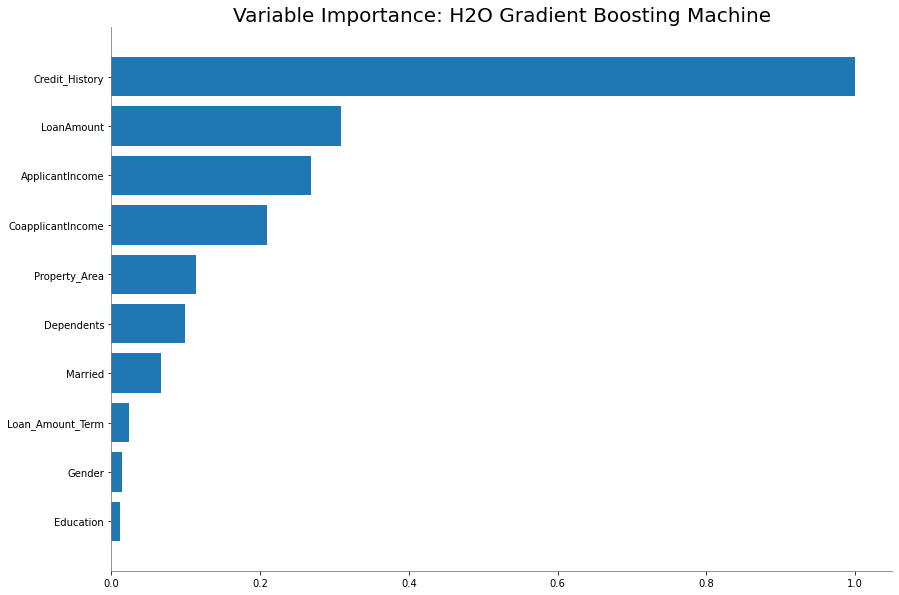

<Figure size 432x288 with 0 Axes>

In [63]:
loan_gbm.varimp_plot()

In [64]:
loan_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644623179919_1140


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11038.0,5.0,5.0,5.0,6.0,21.0,12.94




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07848647170422027
RMSE: 0.2801543712031284
LogLoss: 0.27503156525983635
Mean Per-Class Error: 0.100918458781362
AUC: 0.9716621863799283
AUCPR: 0.9875087321866651
Gini: 0.9433243727598566

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6422248944901441: 


,,N,Y,Error,Rate
0,N,105.0,19.0,0.1532,(19.0/124.0)
1,Y,14.0,274.0,0.0486,(14.0/288.0)
2,Total,119.0,293.0,0.0801,(33.0/412.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.642225,0.943201,283.0
1,max f2,0.503763,0.968179,314.0
2,max f0point5,0.717383,0.952206,259.0
3,max accuracy,0.642225,0.919903,283.0
4,max precision,0.974704,1.000000,0.0
5,max recall,0.396977,1.000000,336.0
6,max specificity,0.974704,1.000000,0.0
7,max absolute_mcc,0.642225,0.807777,283.0
8,max min_per_class_accuracy,0.700341,0.911290,265.0
9,max mean_per_class_accuracy,0.717383,0.913362,259.0



Gains/Lift Table: Avg response rate: 69.90 %, avg score: 69.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.012136,0.970763,1.430556,1.430556,1.000000,0.972297,1.000000,0.972297,0.017361,0.017361,43.055556,43.055556,0.017361
1,2,0.021845,0.968565,1.430556,1.430556,1.000000,0.969319,1.000000,0.970973,0.013889,0.031250,43.055556,43.055556,0.031250
2,3,0.031553,0.966915,1.430556,1.430556,1.000000,0.967805,1.000000,0.969998,0.013889,0.045139,43.055556,43.055556,0.045139
3,4,0.041262,0.963862,1.430556,1.430556,1.000000,0.965429,1.000000,0.968923,0.013889,0.059028,43.055556,43.055556,0.059028
4,5,0.050971,0.961378,1.430556,1.430556,1.000000,0.962738,1.000000,0.967745,0.013889,0.072917,43.055556,43.055556,0.072917
5,6,0.101942,0.949922,1.430556,1.430556,1.000000,0.955402,1.000000,0.961574,0.072917,0.145833,43.055556,43.055556,0.145833
6,7,0.152913,0.936780,1.430556,1.430556,1.000000,0.943777,1.000000,0.955641,0.072917,0.218750,43.055556,43.055556,0.218750
7,8,0.201456,0.924879,1.430556,1.430556,1.000000,0.930489,1.000000,0.949581,0.069444,0.288194,43.055556,43.055556,0.288194
8,9,0.300971,0.896593,1.430556,1.430556,1.000000,0.910766,1.000000,0.936747,0.142361,0.430556,43.055556,43.055556,0.430556
9,10,0.400485,0.854628,1.430556,1.430556,1.000000,0.876073,1.000000,0.921670,0.142361,0.572917,43.055556,43.055556,0.572917




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1521236350367901
RMSE: 0.3900303001521678
LogLoss: 0.47698309081900947
Mean Per-Class Error: 0.2721685689201054
AUC: 0.799111062335382
AUCPR: 0.8706180213774178
Gini: 0.598222124670764

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4373540410643323: 


,,N,Y,Error,Rate
0,N,32.0,36.0,0.5294,(36.0/68.0)
1,Y,2.0,132.0,0.0149,(2.0/134.0)
2,Total,34.0,168.0,0.1881,(38.0/202.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437354,0.874172,165.0
1,max f2,0.243674,0.940594,168.0
2,max f0point5,0.707954,0.833333,130.0
3,max accuracy,0.437354,0.811881,165.0
4,max precision,0.977305,1.000000,0.0
5,max recall,0.069333,1.000000,189.0
6,max specificity,0.977305,1.000000,0.0
7,max absolute_mcc,0.437354,0.575515,165.0
8,max min_per_class_accuracy,0.756747,0.720588,114.0
9,max mean_per_class_accuracy,0.707954,0.752414,130.0



Gains/Lift Table: Avg response rate: 66.34 %, avg score: 69.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014851,0.972897,1.507463,1.507463,1.000000,0.974472,1.000000,0.974472,0.022388,0.022388,50.746269,50.746269,0.022388
1,2,0.024752,0.970866,1.507463,1.507463,1.000000,0.971881,1.000000,0.973435,0.014925,0.037313,50.746269,50.746269,0.037313
2,3,0.034653,0.968711,1.507463,1.507463,1.000000,0.969097,1.000000,0.972196,0.014925,0.052239,50.746269,50.746269,0.052239
3,4,0.044554,0.962312,1.507463,1.507463,1.000000,0.962827,1.000000,0.970114,0.014925,0.067164,50.746269,50.746269,0.067164
4,5,0.054455,0.956024,1.507463,1.507463,1.000000,0.958328,1.000000,0.967971,0.014925,0.082090,50.746269,50.746269,0.082090
5,6,0.103960,0.944997,1.356716,1.435679,0.900000,0.950564,0.952381,0.959682,0.067164,0.149254,35.671642,43.567875,0.134548
6,7,0.153465,0.935294,1.356716,1.410207,0.900000,0.938087,0.935484,0.952716,0.067164,0.216418,35.671642,41.020703,0.187006
7,8,0.202970,0.930385,1.055224,1.323626,0.700000,0.933438,0.878049,0.948014,0.052239,0.268657,5.522388,32.362577,0.195127
8,9,0.301980,0.898546,1.205970,1.285050,0.800000,0.915535,0.852459,0.937365,0.119403,0.388060,20.597015,28.505016,0.255707
9,10,0.400990,0.856165,1.281343,1.284135,0.850000,0.878103,0.851852,0.922732,0.126866,0.514925,28.134328,28.413488,0.338455




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-11 17:13:17,0.001 sec,0.0,0.458680,0.611685,0.500000,0.699029,1.000000,0.300971,0.473902,0.641737,0.500000,0.663366,1.000000,0.336634
1,,2022-02-11 17:13:17,0.008 sec,1.0,0.441372,0.575727,0.850204,0.922598,1.430556,0.186893,0.459090,0.610188,0.748354,0.824620,1.376379,0.188119
2,,2022-02-11 17:13:17,0.013 sec,2.0,0.426915,0.547622,0.856855,0.926273,1.430556,0.179612,0.447218,0.586656,0.761304,0.845191,1.507463,0.188119
3,,2022-02-11 17:13:17,0.019 sec,3.0,0.414772,0.524870,0.858801,0.927312,1.430556,0.174757,0.436698,0.566999,0.758889,0.843575,1.507463,0.188119
4,,2022-02-11 17:13:17,0.024 sec,4.0,0.404366,0.505699,0.869260,0.934223,1.430556,0.174757,0.428566,0.552305,0.755707,0.840275,1.507463,0.188119
5,,2022-02-11 17:13:17,0.029 sec,5.0,0.394709,0.487970,0.880880,0.940616,1.430556,0.167476,0.421039,0.538459,0.765968,0.845295,1.507463,0.188119
6,,2022-02-11 17:13:17,0.035 sec,6.0,0.387125,0.473922,0.882378,0.941525,1.430556,0.160194,0.415620,0.528292,0.772992,0.848671,1.507463,0.188119
7,,2022-02-11 17:13:17,0.040 sec,7.0,0.379430,0.459484,0.892935,0.946292,1.430556,0.150485,0.410867,0.519676,0.771510,0.847338,0.000000,0.193069
8,,2022-02-11 17:13:17,0.045 sec,8.0,0.373761,0.448629,0.894699,0.946803,0.000000,0.148058,0.406441,0.511422,0.775955,0.849158,1.507463,0.193069
9,,2022-02-11 17:13:17,0.050 sec,9.0,0.368233,0.438287,0.898466,0.949555,1.430556,0.148058,0.403289,0.505170,0.779960,0.854021,0.000000,0.193069



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit_History,123.119942,1.000000,0.472079
1,LoanAmount,38.043930,0.308999,0.145872
2,ApplicantIncome,33.127697,0.269068,0.127022
3,CoapplicantIncome,25.717550,0.208882,0.098609
4,Property_Area,14.029879,0.113953,0.053795
5,Dependents,12.140795,0.098609,0.046551
6,Married,8.169347,0.066353,0.031324
7,Loan_Amount_Term,2.919230,0.023710,0.011193
8,Gender,1.738947,0.014124,0.006668
9,Education,1.442456,0.011716,0.005531


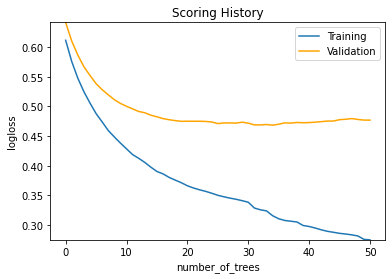

In [67]:
loan_gbm.plot()

In [ ]:
loan_gbm.